## Machine Learning Tasks and Pipelines

This notebook will walk us through the various parts of Machine Learning tasks and pipelines before we jump into deep learning.

What is a task, what are we learning? In this notebook we will walk through a few different scenarios commonly encountered in machine learning. These will help in orienting you before we dive into deep learning. Very often, deep learning is used in tandem with machine learning or as a small part of a larger pipeline. In both these cases, the following terms you see will be useful to be familiar with!

### Imports

We will mostly be using scikit-learn, numpy and scipy to demonstrate these basic concepts.

In [1]:
import sklearn
import numpy as np
import scipy

### Setting up Data

One of the advantages of scikit learn is that it includes functionality to either load sample datasets or generate datasets based on a stochastic process or distribution. 

In [2]:
import sklearn.datasets
import sklearn.model_selection

In [3]:
X_class, y_class = sklearn.datasets.make_classification(n_samples=200, n_features=20, n_classes=2)

In [4]:
X_class[0]

array([-0.74207658,  0.74506451,  0.20955877,  0.37524427,  0.03545785,
        0.08286818, -1.00478528, -0.64286592, -1.86159488,  0.3397009 ,
       -0.19205707,  1.0281245 , -1.48651282,  0.17462445, -0.05783273,
       -0.84400337,  0.24747791, -0.51465518,  1.98684513,  1.146817  ])

In [5]:
y_class[0]

0

In [6]:
import matplotlib.pyplot as plt

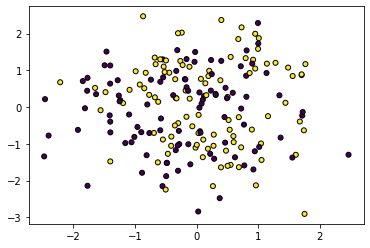

In [7]:
plt.scatter(X_class[:, 0], X_class[:, 1], marker='o', c=y_class, s=25, edgecolor='k')

In [8]:
X_reg, y_reg = sklearn.datasets.make_regression(n_samples=200, n_features=20)

In [9]:
X_reg[0]

array([-0.73605566,  0.290988  ,  0.1233948 ,  1.48961564, -0.23557759,
       -0.97477976,  0.48091437, -0.24626105, -1.00152711,  0.29730979,
        0.99666441,  0.19967195,  1.53597991,  1.92414586,  0.7920898 ,
       -0.40176101, -0.68946238, -0.16835029, -0.87290331, -0.39235357])

In [10]:
y_reg[0]

127.86356792067349

So we've created a toy dataset for classification with 200 samples, 20 features, and 2 target classes. For regression instead of two classes, its one numerical value. Most standard classification and regression have such set ups. 
Let us now split this into training and testing class so that we can begin to train and test models.

In [11]:
X_train_class, X_test_class, y_train_class, y_test_class = sklearn.model_selection.train_test_split(X_class, y_class)

In [12]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = sklearn.model_selection.train_test_split(X_reg, y_reg)

### Supervised Learning 

Supervised learning is the setting where we have labelled training data, or a target value along with our data. Let us now train some simple models to predict values and labels.


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [14]:
logreg = LogisticRegression()

In [15]:
linreg = LinearRegression()

In [16]:
logreg.fit(X_train_class, y_train_class)

LogisticRegression()

In [17]:
linreg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [18]:
logreg.predict(X_test_class[0].reshape(1, -1))

array([0])

In [19]:
linreg.predict(X_test_reg[0].reshape(1, -1))

array([-80.21330878])

Boom! That's all it takes in scikit learn to train a logistic regression and linear regression model, two simple linear machine learning models for classification and regression. Scikit-learn offers many different supervised learning models we can try out: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### Testing and Performance

Once we have our model trained, the next step is to test its performance. Seeing how well our model does is a key part of machine learning and deep learning, and we will have longer sections devoted only to this topic, but let us start with some basic measures of testing performance.

In [20]:
import sklearn.metrics

In [21]:
sklearn.metrics.accuracy_score(y_test_class, logreg.predict(X_test_class))

0.72

In [22]:
sklearn.metrics.r2_score(y_test_reg, linreg.predict(X_test_reg))

1.0

For these toy datasets, basic linear models do well. Scikit-learn has many other metrics: https://scikit-learn.org/stable/modules/model_evaluation.html

### Bias and Variance

When models overfit, they tend to have low bias but high variance, and when they are underfit, they tend to have high bias and low variance. A linear model would likely underfit data, and a polynomial model will overfit data. This example from scipy lectures does a good job illustrating it: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html

In [23]:
def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

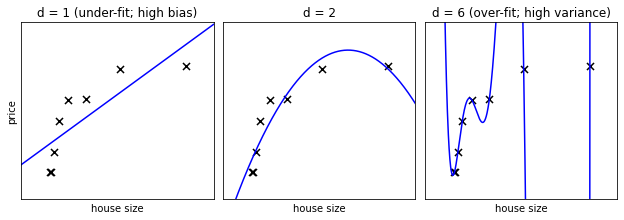

In [25]:
n_samples = 8

np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ['d = 1 (under-fit; high bias)',
          'd = 2',
          'd = 6 (over-fit; high variance)']
degrees = [1, 2, 6]

fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('house size')
    if i == 0:
        ax.set_ylabel('price')

    ax.set_title(titles[i])

### Unsupervised Learning

When we don't have labels associated with data, we turn to the wide range of unsupervised learning tools available to us. A popular approach in unsupervised learning is clustering data. 

#### Clustering 

Clustering algorithms attempt to find groups where objects within the group are more similar to each other than objects out of the group. Let us try and generate some blobs and see how kmeans does in identifying clusters.

https://scikit-learn.org/stable/modules/clustering.html

In [38]:
X_blob, labels = sklearn.datasets.make_blobs(n_samples=200, n_features=20, centers=2)

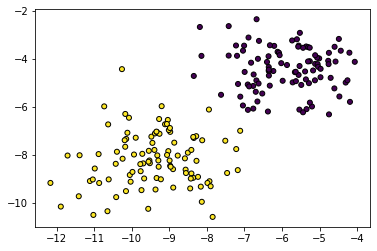

In [43]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='o', c=labels, s=25, edgecolor='k')

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(n_clusters=2)

In [41]:
kmeans.fit(X_blob)

KMeans(n_clusters=2)

In [46]:
labels[0:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [47]:
kmeans.labels_[0:10]

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

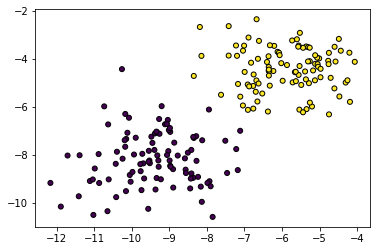

In [44]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='o', c=kmeans.labels_, s=25, edgecolor='k')

Bam - even without any training data kmeans was able to find two clusters. Admittedly, this was a straightforward clustering task and real world tasks are rarely this easy.

#### Dimensionality reduction 

Dimensionality reduction is a widely used class of algorithms used to tranform a high dimensional space to a low dimensional space which retains meaningful relationships and information of the original data.
https://scikit-learn.org/stable/modules/decomposition.html

Let's use the popular Principal Component Analysis (PCA) method which transforms the data into a new set of principal axes while retaining as much of the possible variation. Let us try using it plot our original classification data, which had 20 features.

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)

In [50]:
X_r = pca.fit(X_class).transform(X_class)

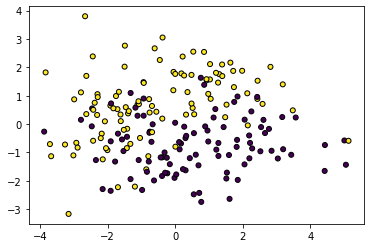

In [51]:
plt.scatter(X_r[:, 0], X_r[:, 1], marker='o', c=y_class, s=25, edgecolor='k')

We see that this transformation distinguishes between the two classes a lot better than the plotting the 1st two features of the 20 dimensional representation!

#### Manifold Learning

Based on the idea of dimensionality reduction, there exist a suite of non-linear approaches to representing data which are more amenable to discovering non-linear representations of data. These methods are also referred to as manifold learning. Let's quickly whip up [tSNE](https://distill.pub/2016/misread-tsne/), a widely used dimensionality reduction method and visualise the data.

https://scikit-learn.org/stable/modules/manifold.html


In [55]:
from sklearn.manifold import TSNE

In [58]:
def plot_tsne(X, y, perplexity=30, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)

    plt.xticks(())
    plt.yticks(())

    plt.show()

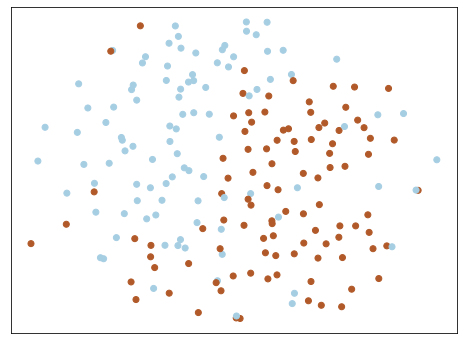

In [59]:
plot_tsne(X_class, y_class, perplexity=50)

Like PCA, this representation of the data is better at visually distinguishing between our two classes. t-SNE does have a few documented issues and peculiarities, which you can see here: [how to use t-SNE effectively](https://distill.pub/2016/misread-tsne/).

#### Metric Learning 

Similar to our previous methods which changed the way we represented data and calculated distances between points, there exists a sub domain of metric learning devoted to learning metrics for a set of data points which are more useful for the task at hand (such as clustering), especially in higher dimensions when the euclidean distance is not as useful. We will be using the metric learn, which is scikit learn compatible. 

In [60]:
import metric_learn

In [61]:
lmnn = metric_learn.LMNN(k=5, learn_rate=1e-6)

In [63]:
lmnn.fit(X_class, y_class)


LMNN(k=5, learn_rate=1e-06)

In [64]:
X_lmnn = lmnn.transform(X_class)

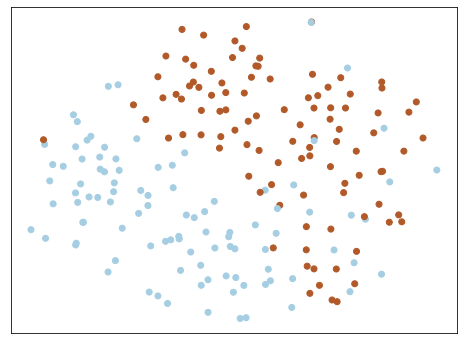

In [68]:
plot_tsne(X_lmnn, y_class, perplexity=30)

### Conclusion

There's a lot more to machine learning (like seriously, a _lot_.) But this should give you some ideas and intuitions about the kinds of things which happen in machine learning, and also introduces a few key concepts which will be popping around in more deep learning focused applications later on.